# 7. 專用函數

In [196]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/wei/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datestr2num', 'indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [142]:
def datestr2num(s):
    return datetime.datetime.strptime(s.decode(), '%d-%m-%Y').date().toordinal()

dates, closes = np.loadtxt('AAPL.csv', delimiter=',', usecols=(1, 6), converters = {1: datestr2num}, unpack=True)
indices = np.lexsort((dates, closes))
indices

array([ 0, 16,  1, 17, 18,  4,  3,  2,  5, 28, 19, 21, 15,  6, 29, 22, 27,
       20,  9,  7, 25, 26, 10,  8, 14, 11, 23, 12, 24, 13])

In [143]:
dates = dates.astype(int)

In [144]:
[(datetime.date.fromordinal(dates[i]), closes[i]) for i in indices]

[(datetime.date(2011, 1, 28), 336.10000000000002),
 (datetime.date(2011, 2, 22), 338.61000000000001),
 (datetime.date(2011, 1, 31), 339.31999999999999),
 (datetime.date(2011, 2, 23), 342.62),
 (datetime.date(2011, 2, 24), 342.88),
 (datetime.date(2011, 2, 3), 343.44),
 (datetime.date(2011, 2, 2), 344.31999999999999),
 (datetime.date(2011, 2, 1), 345.02999999999997),
 (datetime.date(2011, 2, 4), 346.5),
 (datetime.date(2011, 3, 10), 346.67000000000002),
 (datetime.date(2011, 2, 25), 348.16000000000003),
 (datetime.date(2011, 3, 1), 349.31),
 (datetime.date(2011, 2, 18), 350.56),
 (datetime.date(2011, 2, 7), 351.88),
 (datetime.date(2011, 3, 11), 351.99000000000001),
 (datetime.date(2011, 3, 2), 352.12),
 (datetime.date(2011, 3, 9), 352.47000000000003),
 (datetime.date(2011, 2, 28), 353.20999999999998),
 (datetime.date(2011, 2, 10), 354.54000000000002),
 (datetime.date(2011, 2, 8), 355.19999999999999),
 (datetime.date(2011, 3, 7), 355.36000000000001),
 (datetime.date(2011, 3, 8), 355.759

## 7.4 對複數進行排序

In [145]:
np.random.seed(42)
complex_numbers = np.random.random(5) + 1j * np.random.random(5)
complex_numbers

array([ 0.37454012+0.15599452j,  0.95071431+0.05808361j,
        0.73199394+0.86617615j,  0.59865848+0.60111501j,
        0.15601864+0.70807258j])

In [146]:
np.sort_complex(complex_numbers)

array([ 0.15601864+0.70807258j,  0.37454012+0.15599452j,
        0.59865848+0.60111501j,  0.73199394+0.86617615j,
        0.95071431+0.05808361j])

## 7.5 Search

In [147]:
a = np.array([2, 4, 8])
a

array([2, 4, 8])

In [148]:
np.argmax(a)

2

In [149]:
np.argmin(a)

0

In [150]:
b = np.array([np.nan, 2, 4])
b

array([ nan,   2.,   4.])

In [151]:
np.nanargmax(b)

2

In [152]:
np.nanargmin(b)

1

In [153]:
a

array([2, 4, 8])

In [154]:
np.argwhere(a < 6)

array([[0],
       [1]])

## 7.6 searchsorted

In [155]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [156]:
to_insert = [1, 3]
indices = np.searchsorted(a, to_insert)
indices

array([1, 3])

In [157]:
np.insert(a, indices, to_insert)

array([0, 1, 1, 2, 3, 3, 4])

## 7.8 從數組中抽取元素

In [158]:
a = np.arange(7)
a

array([0, 1, 2, 3, 4, 5, 6])

In [159]:
condition = (a % 2) == 0
condition

array([ True, False,  True, False,  True, False,  True], dtype=bool)

In [160]:
np.extract(condition, a)

array([0, 2, 4, 6])

In [161]:
np.nonzero(a)

(array([1, 2, 3, 4, 5, 6]),)

## 7.10 計算終值 (future value)

In [162]:
present_value = 1000
rate_per_year = 0.03
periods_per_year = 4
duratino_years = 5
amount_per_period = 10
np.fv(rate_per_year / periods_per_year, periods_per_year * duratino_years, -1 * amount_per_period, - present_value)

1376.0963320407982

## 7.12 計算 現值 (present value)

In [163]:
np.pv(rate_per_year / periods_per_year, periods_per_year * duratino_years, -1 * amount_per_period, 1376.0963320407982)

-1000.0

## 7.14 計算 淨現值 (net present value)

In [164]:
cashflows = np.random.randint(100, size = 5)
cashflows = np.insert(cashflows, 0, -100)
cashflows

array([-100,   21,   52,    1,   87,   29])

In [165]:
np.npv(rate_per_year, cashflows)

72.63250636467717

## 7.16 內部收益率 (irr, internal rate of return)

In [166]:
np.irr(cashflows)

0.23123947848800985

## 7.18 分期付款

In [167]:
mogedge = 1000000
rate_per_year = 0.1
periods_per_year = 12
duratino_years = 30
amount_per_period = 0

np.pmt(rate_per_year / periods_per_year, periods_per_year * duratino_years, mogedge)

-8775.7157008879931

## 7.20 付款期數

In [168]:
mogedge = 9000
rate_per_year = 0.1
periods_per_year = 12
duratino_years = 30
amount_per_period = 100

np.nper(rate_per_year / periods_per_year, - amount_per_period, mogedge)

167.04751180075235

## 7.22 利率

In [169]:
np.rate(167, -1 * amount_per_period, mogedge, 0) * periods_per_year

0.099975642066404219

## 7.23 Window function

## 7.24 Bartlett window

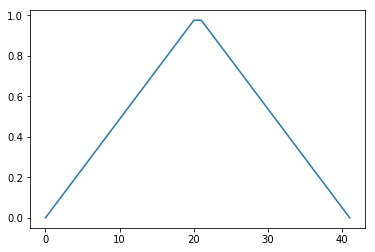

In [170]:
window = np.bartlett(42)
plot(window)
show()

## 7.26 Blackman window

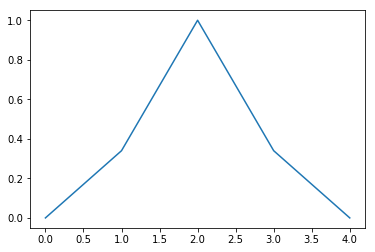

In [177]:
N = 5
window = np.blackman(N)
plot(window)
show()

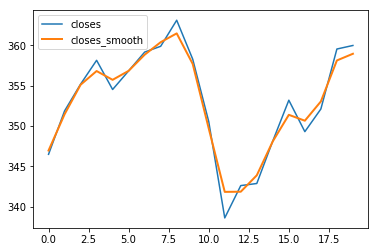

In [178]:
cloeses_windowed = np.convolve(window / window.sum(), closes, mode = 'same')
plot(closes[N: -N], label = 'closes')
plot(cloeses_windowed[N: -N], label = 'closes_smooth', lw = 2)
legend(loc = 'best')
show()

## 7.28 Hamming window

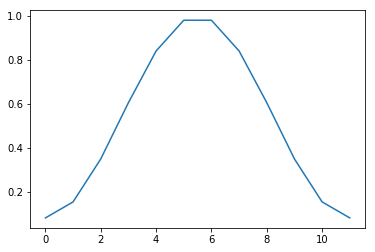

In [187]:
N = 12
window = np.hamming(N)
plot(window)
show()

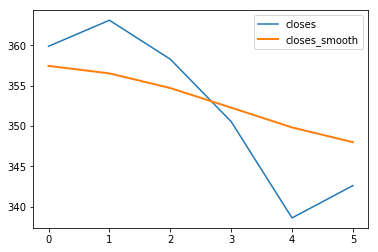

In [188]:
cloeses_windowed = np.convolve(window / window.sum(), closes, mode = 'same')
plot(closes[N: -N], label = 'closes')
plot(cloeses_windowed[N: -N], label = 'closes_smooth', lw = 2)
legend(loc = 'best')
show()

## 7.30 Kaiser window

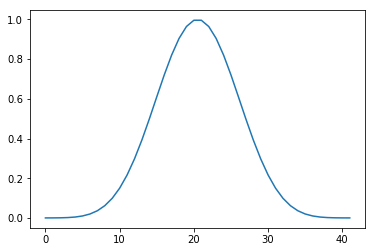

In [189]:
window = np.kaiser(42, 14)
plot(window)
show()

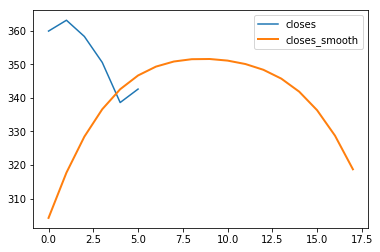

In [190]:
cloeses_windowed = np.convolve(window / window.sum(), closes, mode = 'same')
plot(closes[N: -N], label = 'closes')
plot(cloeses_windowed[N: -N], label = 'closes_smooth', lw = 2)
legend(loc = 'best')
show()

## 7.32 Bessel function

In [191]:
x = np.linspace(0, 4, 100)

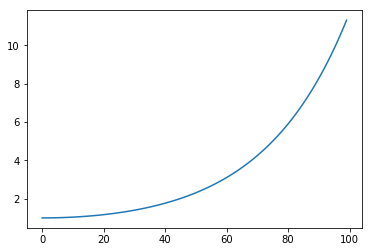

In [192]:
vals = np.i0(x)
plot(vals)
show()

## 7.34 Sinc

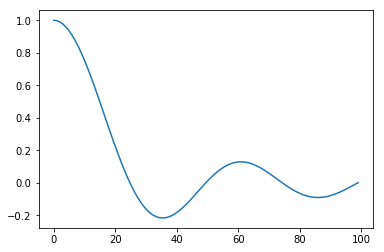

In [193]:
vals = np.sinc(x)
plot(vals)
show()

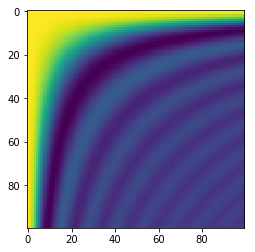

In [195]:
xx = np.outer(x, x)
plt.imshow(np.sinc(xx))
show()